In [31]:
import os,cv2,torch,torchvision
import detectron2
from detectron2.evaluation import COCOEvaluator,inference_context,inference_on_dataset
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog,MetadataCatalog,build_detection_test_loader
from detectron2.engine import DefaultPredictor,DefaultTrainer
from detectron2.model_zoo import get_checkpoint_url,get_config_file
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import Visualizer,BoxMode
import numpy as np
import pandas as pd
from tqdm import tqdm

In [32]:
data = pd.read_csv('./labels_train.csv').append(pd.read_csv('./labels_val.csv'))

In [33]:
data = data.append(pd.read_csv('./labels_trainval.csv'))

In [34]:
data.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [35]:
def load_data(data=data,test=False):
    if 'dataset.npy' in os.listdir('./'):
        try:
            dataset = np.load('./dataset.npy',allow_pickle=True)
        except:
            dataset = np.loadtxt('./dataset.npy')
        if test is False:
            return dataset
    data = data[:1250]
    print(data.iloc[0])
    dataset = []
    for idx in tqdm(range(len(data))):
        record = {}
        info = data.iloc[idx]
        xmin,ymin,xmax,ymax = info['xmin'],info['ymin'],info['xmax'],info['ymax']
        height,width = cv2.imread('./images/' + info['frame']).shape[:2]
        record['file_name'] = './images/' + info['frame']
        record['height'] = height
        record['width'] = width
        info['class_id'] = info['class_id'] - 1
        record['cateogry_id'] = info['class_id']
        objs = [{'bbox':[info['xmin'],info['ymin'],info['xmax'],info['ymax']],'bbox_mode':BoxMode.XYXY_ABS,'iscrowd':0,'category_id':info['class_id']}]
        record['image_id'] = idx
        record['annotations'] = objs
        record['class_id'] = info['class_id']
        record['xmin'] = xmin
        record['ymin'] = ymin
        record['xmax'] = xmax
        record['ymax'] = ymax
        dataset.append(record)
    if test is False:
        if 'dataset.npy' not in os.listdir('./'):
            try:
                np.save('./dataset.npy',dataset)
            except:
                np.savetxt('./dataset.npy',dataset)
    return dataset

In [36]:
# test_data = load_data(data=data[:1250])

In [37]:
classes = ['car', 'truck', 'pedestrian', 'bicyclist', 'light']

In [38]:
DatasetCatalog.register('data',lambda : load_data())
MetadataCatalog.get('data').set(thing_classes=classes)
metadata = MetadataCatalog.get('data')
DatasetCatalog.register('test',lambda : load_data(test=True))
MetadataCatalog.get('test').set(thing_classes=classes)
metadata = MetadataCatalog.get('test')

AssertionError: Dataset 'data' is already registered!

In [ ]:
import wandb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='baseline')
# model = 'COCO-Detection/faster_rcnn_R_101_DC5_3x.yaml'
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.MAX_ITER = 2500 + 1250
# # cfg.TEST.EVAL_PERIOD = 50
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# img = cv2.imread('./images/1478019953180167674.jpg')
# predictor = DefaultPredictor(cfg)
# preds = predictor(img)['instances'].to('cpu')
# v = Visualizer(img[:,:,::-1],metadata=metadata,scale=1)
# v = v.draw_instance_predictions(preds)
# v = v.get_image()[:,:,::-1]
# wandb.log({'img':wandb.Image(v)})
# plt.figure(figsize=(10,7))
# plt.imshow(v)
# plt.show()

In [ ]:
IMGS = ['1478020264690914781.jpg','1478020243205145193.jpg','1478020284690878247.jpg','1478020285197265564.jpg']
# for IMG in IMGS:
#     predictor = DefaultPredictor(cfg)
#     img = cv2.imread(f'./images/{IMG}')
#     v = Visualizer(img[:,:,::-1],metadata=metadata)
#     v = v.draw_instance_predictions(predictor(img)['instances'].to('cpu'))
#     plt.figure(figsize=(10,7))
#     plt.imshow(v.get_image()[:,:,::-1])
#     plt.show()

In [39]:
models = [
#     'faster_rcnn_R_101_C4_3x.yaml',
#     'faster_rcnn_R_101_DC5_3x.yaml',
#     'faster_rcnn_R_101_FPN_3x.yaml',
#     'faster_rcnn_R_50_C4_1x.yaml',
#     'faster_rcnn_R_50_C4_3x.yaml',
#     'faster_rcnn_R_50_DC5_1x.yaml',
#     'faster_rcnn_R_50_DC5_3x.yaml',
#     'faster_rcnn_R_50_FPN_1x.yaml',
#     'faster_rcnn_R_50_FPN_3x.yaml',
#     'faster_rcnn_X_101_32x8d_FPN_3x.yaml',
#     'faster_rcnn_R_101_DC5_3x.yaml'
]

In [40]:
# for model in tqdm(models):
#     print('*'*50)
#     print(model)
#     print('*'*50)
#     wandb.init(sync_tensorboard=True,name=model)
#     model = 'COCO-Detection/' + model
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = 0.00025
#     cfg.SOLVER.MAX_ITER = 625
#     cfg.SOLVER.IMS_PER_BATCH = 2
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = './output/model_final.pth'
#     torch.cuda.empty_cache()
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaluator = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaluator)
#     wandb.log(results)
#     torch.cuda.empty_cache()
#     for IMG in IMGS:
#         predictor = DefaultPredictor(cfg)
#         img = cv2.imread(f'./images/{IMG}')
#         v = Visualizer(img[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(predictor(img)['instances'].to('cpu'))
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [41]:
# fast_rcnn/cls_accuracy = faster_rcnn_R_50_DC5_3x.yaml / faster_rcnn_R_101_DC5_3x.yaml
# fast_rcnn/fg_cls_accuracy = faster_rcnn_R_101_C4_3x.yaml
# fast_rcnn/false_negative = faster_rcnn_R_101_C4_3x.yaml
# bbox.AP75 = faster_rcnn_R_50_DC5_1x.yaml
# bbox.APs = faster_rcnn_R_101_C4_3x.yaml
# bbox.APm = faster_rcnn_X_101_32x8d_FPN_3x.yaml
# bbox.AP50 = faster_rcnn_X_101_32x8d_FPN_3x.yaml
# bbox.AP = faster_rcnn_X_101_32x8d_FPN_3x.yaml
# bbox.APl = faster_rcnn_R_50_C4_1x.yaml
# loss_box_reg = faster_rcnn_R_50_DC5_3x.yaml
# total_loss = faster_rcnn_R_101_DC5_3x.yaml
# loss_rpn_cls = faster_rcnn_R_101_DC5_3x.yaml
# loss_rpn_loc = faster_rcnn_R_101_C4_3x.yaml
# loss_cls = faster_rcnn_R_101_C4_3x.yaml

# faster_rcnn_X_101_32x8d_FPN_3x.yaml = 3
# faster_rcnn_R_101_C4_3x.yaml = 5
# faster_rcnn_R_101_DC5_3x.yaml = 3
# faster_rcnn_R_50_DC5_3x.yaml = 2
# faster_rcnn_R_50_DC5_1x.yaml = 1
# faster_rcnn_R_50_C4_1x.yaml = 1

In [42]:
BASE_LRS = []
IMS_PER_BATCHS = []
BATCH_SIZE_PER_IMAGES = []

In [43]:
# model = 'COCO-Detection/faster_rcnn_R_101_C4_3x.yaml'
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True)
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.MAX_ITER = 2500+1250
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
# cfg.MODEL.WEIGHTS = "./output/model_final.pth"
# predictor = DefaultPredictor(cfg)
# evaulautor = COCOEvaulotor('test',cfg,False,output_dir='./output/')
# val_loader = build_detection_test_loader(cfg,'test')
# results = inference_on_dataset(trainer.model,val_loader,evaulautor)
# wandb.log(results)
# for IMG in IMGS:
#     preds = predictor(cv2.imread('./images/' + IMG))['instances'].to('cpu')
#     v = Visualizer(img[:,:,::-1],metadata=metadata)
#     v = v.draw_instance_predictions(preds)
#     v = v.get_images()[:,:,::-1]
#     wandb.log({IMG:wandb.Image(v)})
# wandb.finish()

In [44]:
model = 'COCO-Detection/faster_rcnn_R_101_C4_3x.yaml'

In [45]:
# BASE_LRS = [
# #     0.00025,
# #             0.00050,
# #             0.00075,
# #             0.0001,
# #             0.001,
# #             0.01,
# #     0.0002,
# #     0.0003,
# #     0.0004,
# #     0.0005,
# #     0.0006,
# #     0.0007,
# #     0.0008,
# #     0.0009,
# ]
# for BASE_LR in BASE_LRS:
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{BASE_LR}')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625
#     cfg.SOLVER.IMS_PER_BATCH = 2
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in IMGS:
#         preds = predictor(cv2.imread('./images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [46]:
# fast_rcnn/cls_accuracy = 0.0003
# fast_rcnn/fg_cls_accuracy = 0.00075
# fast_rcnn/false_negative = 0.00075

# bbox.AP75 = 0.01

# bbox.APs = 0.001

# bbox.APm = 0.0002

# bbox.AP50 = 0.0001

# bbox.AP = 0.0001

# bbox.APl = 0.0004
# loss_box_reg = 0.001
# total_loss = 0.001
# loss_rpn_cls = 0.001

# loss_rpn_loc = 0.0002
# loss_cls = 0.01

In [47]:
# 0.0003 = 1
# 0.00075 = 2
# 0.01 = 2
# 0.001 = 4
# 0.0002 = 2
# 0.0001 = 2
# 0.0004 = 1

In [48]:
# IMS_PER_BATCHS = [
# #     1,
# #     2,
# #     3,
# #     4,
# #     5,
# #     6,
# #     7,
# #     8,
# #     9,
# #     10
# ]
# for IMS_PER_BATCH in IMS_PER_BATCHS:
#     BASE_LR = 0.001
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{IMS_PER_BATCH}')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625
#     cfg.SOLVER.IMS_PER_BATCH = IMS_PER_BATCH
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in IMGS:
#         preds = predictor(cv2.imread('./images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [49]:
# BATCH_SIZE_PER_IMAGES = [
# #     121,
# #     122,
# #     123,
# #     124,
#     125,
# #     126,
# #     127,
# #     129
# ]
# for BATCH_SIZE_PER_IMAGE in BATCH_SIZE_PER_IMAGES:
#     BASE_LR = 0.001
#     IMS_PER_BATCH = 5
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{BATCH_SIZE_PER_IMAGE}')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625
#     cfg.SOLVER.IMS_PER_BATCH = IMS_PER_BATCH
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = BATCH_SIZE_PER_IMAGE
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in IMGS:
#         preds = predictor(cv2.imread('./images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [50]:
# fast_rcnn/cls_accuracy = 128
# fast_rcnn/fg_cls_accuracy = 128
# bbox.AP75 = 128/16
# bbox.APs = 16
# bbox.APm = 128

# bbox.AP50 = 128/64/16
# bbox.AP = 128
# bbox.APl = 128
# loss_box_reg = 128
# total_loss = 128
# loss_rpn_cls = 64
# loss_rpn_loc = 32
# loss_cls = 128
# 128!

In [51]:
torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='final')
model = 'COCO-Detection/faster_rcnn_R_101_C4_3x.yaml'
BASE_LR = 0.001
IMS_PER_BATCH = 5
cfg = get_cfg()
cfg.merge_from_file(get_config_file(model))
cfg.DATASETS.TRAIN = ('data',)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
cfg.SOLVER.MAX_ITER = 5000+1250
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.STEPS = []
cfg.SOLVER.IMS_PER_BATCH = IMS_PER_BATCH
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
# trainer.train()
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)
# evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
# val_loader = build_detection_test_loader(cfg,'test')
# results = inference_on_dataset(trainer.model,val_loader,evaulautor)
# wandb.log(results)
wandb.finish()

[06/15 16:59:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (6, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (6,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (20, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (20,) in the model! You might want to double check if this is expected.


In [52]:
cap = cv2.VideoCapture('./0.mp4')

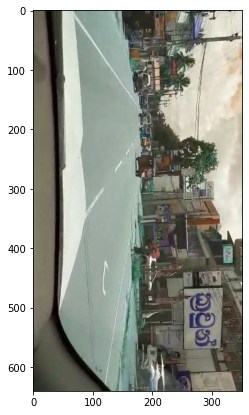

In [70]:
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('./test/0'+str(i)+'.jpg',frame)
    frame = cv2.flip(cv2.imread('./test/0'+str(i)+'.jpg'),2)
    
    break
    i+=1
cap.release()
cv2.destroyAllWindows()
plt.figure(figsize=(10,7))
plt.imshow(frame)
plt.show()

In [28]:
imgs = os.listdir('./test/')
for img in tqdm(imgs[:500]):
    v = Visualizer(cv2.imread('./test/' + img)[:,:,::-1],metadata=metadata)
    v = v.draw_instance_predictions(predictor(cv2.imread('./test/' + img))['instances'].to('cpu'))
    v = v.get_image()[:,:,::-1]
    cv2.imwrite('./test/' + img,v)
#     plt.figure(figsize=(10,7))
#     plt.imshow(v)
#     plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]/home/indika/anaconda3/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()
100%|██████████| 500/500 [03:04<00:00,  2.72it/s]


In [29]:
len(imgs)

2441

In [30]:
from moviepy.editor import *

img = os.listdir('./test/')
imgs = []
for i in tqdm(img[:500]):
    imgs.append('./test/' + i)
clips = [ImageClip(m).set_duration(1)
      for m in tqdm(imgs)]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("test.mp4",fps=24)

t:   0%|          | 0/12000 [00:00<?, ?it/s, now=None]

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4
